In [1]:
import requests
from rich import print as rPrint
import io
from PIL import Image
import matplotlib.pyplot as plt
import json

In [35]:
resource = requests.get("http://192.168.15.149:5000")

resource.headers['Content-Type']

'text/html; charset=utf-8'

### send a request to the api server

In [6]:

data = {
    # "model": "gpt-4",
    "message": "please give me a prompt only replay json format like {prompt:...}",
}


resource = requests.post("http://140.113.89.60:5000/chat" , json=data)


In [73]:
resource.json()
prompt = json.loads(resource.json()["message"])
prompt

{'prompt': 'Write a short story about a girl who discovers she can teleport.'}

In [74]:

print(resource.headers['Content-Type'])
print(resource.text)


application/json
{
  "message": "{\"prompt\": \"Write a short story about a girl who discovers she can teleport.\"}"
}



#### use the prompt to generate a image

In [81]:

resource = requests.post("http://140.113.89.60:5000/generate",json=prompt)
print(resource.headers['Content-Type'])

if resource.headers['Content-Type'] == "application/json":
    print(resource.text)

def to_Image(data: bytes):
    image_io = io.BytesIO(data)

    return Image.open(image_io)


def plt_image(image):
    plt.imshow(image)
    plt.axis("off")  # Optionally, turn off the axis labels
    plt.show()



application/json
{
  "message": "we only accept format like {'name':'...', 'prompt':'...'}"
}



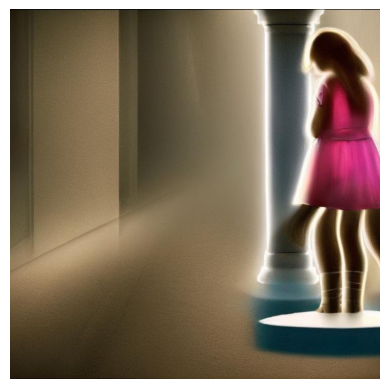

In [76]:

plt_image(to_Image(resource.content))


In [14]:
import requests
resource = requests.post("http://140.113.89.60:5000/test" , json={"prompt":"Hello"})

In [15]:
from rq.job import Job
from redis import Redis
data  = resource.json()

job = Job.fetch(data['task_id'], connection=Redis())

In [17]:
import time
while not job.is_finished:
    time.sleep(1)
    
jj = job.result

jj.json()

{'file_name': 'e53bd533-07ff-5417-ac6a-369f50ef3878.jpg',
 'file_path': './image\\tmp\\e53bd533-07ff-5417-ac6a-369f50ef3878.jpg',
 'id': 'e53bd533-07ff-5417-ac6a-369f50ef3878',
 'request-path': 'http://140.113.89.60:5000/result',
 'time': 'Wed, 25 Oct 2023 22:52:32 GMT'}

In [38]:
resource_new = requests.post("http://140.113.89.60:5000/test-result" , json={'task_id': '397c1ad1-523e-4c45-817c-3b375f591d8f'})

In [12]:
import requests
resource = requests.get("http://127.0.0.1:5000")

In [12]:
resource.text

'<!DOCTYPE html>\n<html>\n  <head>\n    <link\n      rel="stylesheet"\n      type="text/css"\n      href="/static/styles.css"\n    />\n  </head>\n\n  <body>\n    <div class="centered-label">\n      <label class="label"\n        >Hello, welcome to KYchat, we are using gpt4free version is\n        0.1.7.6</label\n      >\n    </div>\n  </body>\n</html>'

In [13]:
import requests

In [13]:
import requests
resource = requests.post("http://140.113.89.60:5000/generate",json={"name":"ky" , "prompt":"Anime: A couple is walking hand in hand along the beach."})

In [14]:
jj = resource.json()

In [15]:
jj

{'file_name': '2510317a-68c0-5995-9de2-d68f0bf59d6e.jpg',
 'file_path': './image\\ky\\2510317a-68c0-5995-9de2-d68f0bf59d6e.jpg',
 'id': '2510317a-68c0-5995-9de2-d68f0bf59d6e',
 'request-path': 'http://140.113.89.60:5000/result',
 'time': 'Thu, 26 Oct 2023 20:39:34 GMT'}

In [16]:
resource = requests.post("http://140.113.89.60:5000/result" , json=jj)

In [17]:
import io
from PIL import Image
def bytes_to_image(bytes_of_image):
    """
    The function `bytes_to_image` converts a byte array representing an image into an Image object.

    :param bytes_of_image: The parameter `bytes_of_image` is expected to be a byte array that represents
    an image
    :return: an Image object.
    """
    img_byte_array = io.BytesIO(bytes_of_image)
    return Image.open(img_byte_array)

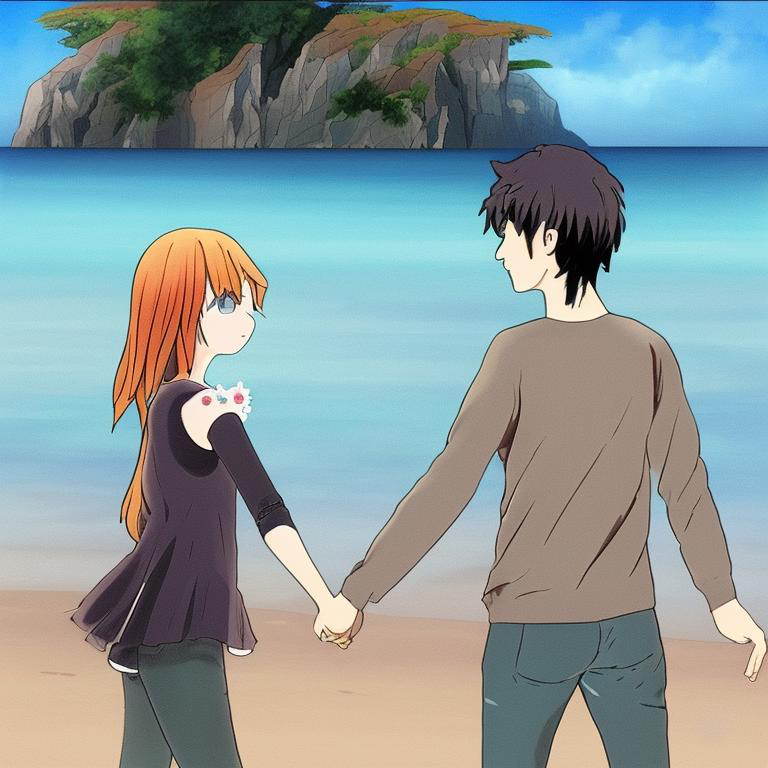

In [18]:
bytes_to_image(resource.content)

In [3]:
resource.json()

{'file_name': 'c940cc49-c5c2-5153-9242-34d86281f6eb.jpg',
 'file_path': './image\\ky\\c940cc49-c5c2-5153-9242-34d86281f6eb.jpg',
 'id': 'c940cc49-c5c2-5153-9242-34d86281f6eb',
 'request-path': 'http://172.20.224.1:5000/result',
 'time': 'Mon, 23 Oct 2023 21:14:28 GMT'}

In [39]:
resource_new

<Response [500]>

In [50]:


response = requests.post('http://140.113.89.60:5000/test')

# 检查响应的 Content-Type 标头以确定编码类型
content_type = response.headers['Content-Type']




In [51]:
content_type

'image/jpeg'

In [39]:
from collections import deque

dq = deque()
dq.append(("hello" , "KY"))
dq.append(("hello" , "zip"))

In [41]:
("hello" , "KY") in dq

True

In [10]:
import io
from PIL import Image
def image_to_bytes(image):
    """
    The function `image_to_bytes` converts an image object into a byte array.

    :param image: The "image" parameter is expected to be a PIL (Python Imaging Library) image object
    :return: the image data as bytes.
    """
    img_byte_array = io.BytesIO()
    image.save(img_byte_array, format="JPEG")
    img_data = img_byte_array.getvalue()
    img_byte_array.close()
    return img_data


def bytes_to_image(bytes_of_image):
    """
    The function `bytes_to_image` converts a byte array representing an image into an Image object.

    :param bytes_of_image: The parameter `bytes_of_image` is expected to be a byte array that represents
    an image
    :return: an Image object.
    """
    img_byte_array = io.BytesIO(bytes_of_image)
    return Image.open(img_byte_array)

In [11]:
import redis
from PIL import Image
# Create a connection to the Redis server (assuming it's running locally on the default port)
r = redis.StrictRedis()

# Set a key-value pair
# r.set('my_key', 'my_value')

# Get the value associated with a key
image_path = "../api/image/ky/35987ce9-cc38-59e6-89ca-b77d8d9f925c.jpg"
image= Image.open(image_path)
bb = image_to_bytes(image)
bb


b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\x08\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x03\x00\x03\x00\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca\xd2\xd

In [12]:
r.set('my_key_1' , bb)
r.expire('my_key_1', 86400)

True

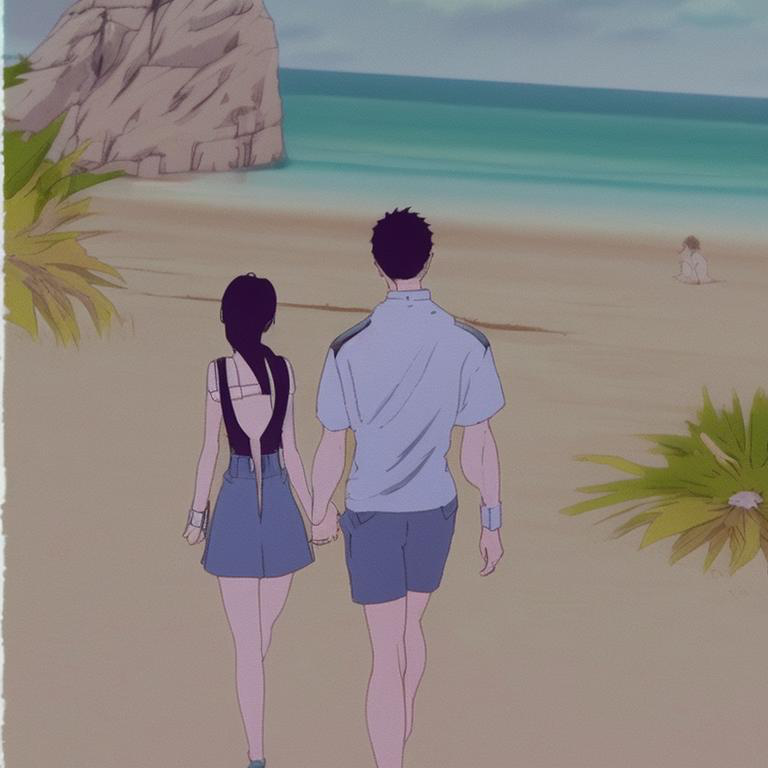

In [13]:
value = r.get('my_key_1')
bytes_to_image(value)


In [15]:
import pickle

data = pickle.dumps([1,2,3])
data

b'\x80\x04\x95\x0b\x00\x00\x00\x00\x00\x00\x00]\x94(K\x01K\x02K\x03e.'

In [19]:
check = pickle.loads(data)
check

[1, 2, 3]

In [37]:
import uuid
print(uuid.uuid5(namespace= uuid.NAMESPACE_DNS
, name="ya"))

8d24f34b-e718-583e-9a36-4cad834652ba


In [39]:
print(uuid.uuid5(namespace= uuid.NAMESPACE_DNS
, name="ya"))

8d24f34b-e718-583e-9a36-4cad834652ba


In [14]:
import socket

socket.gethostbyname(socket.gethostname())

'172.17.47.220'

In [4]:
%pip install diffusers 

     ---------------------------------------- 1.5/1.5 MB 6.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install --upgrade diffusers transformers

     ---------------------------------------- 7.7/7.7 MB 3.1 MB/s eta 0:00:00
     -------------------------------------- 302.0/302.0 kB 2.7 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 2.2 MB/s eta 0:00:00
     -------------------------------------- 295.0/295.0 kB 1.7 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.15.1
    Uninstalling huggingface-hub-0.15.1:
      Successfully uninstalled huggingface-hub-0.15.1
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.13.3
    Uninstalling tokenizers-0.13.3:
      Successfully uninstalled tokenizers-0.13.3
  Attempting uninstall: transformers
    Found existing installation: transformers 2.1.1
    Uninstalling transformers-2.1.1:
      Successfully uninstalled transformers-2.1.1
Note: you may need to restart the kernel to use updated packages.


In [5]:
from diffusers import AudioLDMPipeline
import torch

repo_id = "cvssp/audioldm-s-full-v2"
pipe = AudioLDMPipeline.from_pretrained(repo_id, torch_dtype=torch.float16)


In [ ]:
pipe = pipe.to("cuda")

prompt = "Techno music with a strong, upbeat tempo and high melodic riffs"
audio = pipe(prompt, num_inference_steps=10, audio_length_in_s=5.0).audios[0]

In [4]:
%pip install accelerate

     -------------------------------------- 258.1/258.1 kB 2.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import scipy
import torch
from diffusers import AudioLDM2Pipeline

repo_id = "cvssp/audioldm2"
pipe = AudioLDM2Pipeline.from_pretrained(repo_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

# define the prompts
prompt = "The sound of a hammer hitting a wooden surface."
negative_prompt = "Low quality."

# set the seed for generator
generator = torch.Generator("cuda").manual_seed(0)

# run the generation
audio = pipe(
    prompt,
    negative_prompt=negative_prompt,
    num_inference_steps=200,
    audio_length_in_s=10.0,
    num_waveforms_per_prompt=3,
    generator=generator,
).audios

print(type(audio))

# save the best audio sample (index 0) as a .wav file
scipy.io.wavfile.write("techno.wav", rate=16000, data=audio[0])

c:\Users\USER\anaconda3\envs\Py311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
unet\diffusion_pytorch_model.safetensors not found
100%|██████████| 200/200 [00:41<00:00,  4.78it/s]


<class 'numpy.ndarray'>


In [6]:
%pip install rq

     -------------------------------------- 95.8/95.8 kB 684.3 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import redis

# 创建一个 Redis 连接
redis_conn = redis.StrictRedis(host='140.113.89.60', port=6379, db=0)

# 使用 ping 方法检查连接
try:
    redis_conn.ping()
    print('已成功连接到 Redis 服务器')
except redis.exceptions.ConnectionError:
    print('无法连接到 Redis 服务器')


已成功连接到 Redis 服务器
